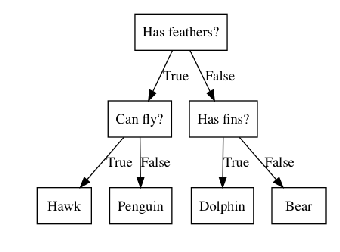

In [2]:
import mglearn
mglearn.plots.plot_animal_tree()

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

# とりあえず、タイブレーク時に
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy training: {tree.score(X_train, y_train)}")
print(f"Accuracy test: {tree.score(X_test, y_test)}")


Accuracy training: 1.0
Accuracy test: 0.9370629370629371


In [16]:
# 枝刈りをしない場合には、木がいくらでも複雑になり過剰適合になりやすい。
# そのため、treeの深さを制限する
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f"Accuracy training: {tree.score(X_train, y_train)}")
print(f"Accuracy test: {tree.score(X_test, y_test)}")


Accuracy training: 0.9882629107981221
Accuracy test: 0.951048951048951
